In [51]:
import pickle
import pandas as pd
import requests
from bs4 import BeautifulSoup
import sys
import os
from collections import defaultdict
import re
import json
from collections import Counter
import dateutil
from dateutil import parser
from collections import defaultdict
from __future__ import division
import datetime
%pylab inline
from numpy import arange
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [52]:
def parseint(string):
    string = str(string)
    return int(''.join([x for x in string if x.isdigit()]))

In [53]:
with open('movie_info_revised.p' ,'r') as picklefile:
    data = pickle.load(picklefile)

In [54]:
def date_helper(date):
    try:
        date = parser.parse(date)
        return True
    except: 
        pass
    return False

In [55]:
history_keys_dic = defaultdict(dict)
for key in data.keys():
    if 'Biography' in data[key]['genre']:
        if date_helper(data[key]['date']):
            year = parser.parse(data[key]['date']).year
            history_keys_dic['count'][year]= history_keys_dic['count'].get(year, 0) + 1  
history_df = pd.DataFrame.from_dict(history_keys_dic)
start = pd.datetime(1972, 1, 1)
end = pd.datetime(2016, 1, 1)
x = pd.date_range(start, end, freq='A').year
history_df_years = history_df.reindex(x)
history_df = history_df_years.fillna(0)
history_df['rolling mean']=pd.rolling_mean(history_df['count'], 5).shift(+1)
history_df['difference from mean']=history_df['count']/history_df['rolling mean']

In [56]:
history_df

,count,rolling mean,difference from mean
1972,1,NaN,NaN
1973,5,NaN,NaN
1974,4,NaN,NaN
1975,6,NaN,NaN
1976,7,NaN,NaN
1977,5,4.6,1.086957
1978,3,5.4,0.555556
1979,4,5.0,0.800000
1980,4,5.0,0.800000
1981,8,4.6,1.739130


In [57]:
history_dic = defaultdict(dict)
for key in data.keys():
    if 'Biography' in data[key]['genre']:
        if date_helper(data[key]['date']):
            year = parser.parse(data[key]['date']).year
            history_dic[year][key]= defaultdict(dict)
            history_dic[year][key]['date']= data[key]['date']
            history_dic[year][key]['screens']= data[key]['screens']
            history_dic[year][key]['opening']= data[key]['opening']
                #space_dic['space'][year].append(key,)

In [58]:
history_dic

defaultdict(<type 'dict'>, {1972: {'Brother Sun, Sister Moon': defaultdict(<type 'dict'>, {'date': '2 December 1972', 'screens': 'Error', 'opening': 'N/A'})}, 1973: {'Hitler: The Last Ten Days': defaultdict(<type 'dict'>, {'date': '9 May 1973', 'screens': 'Error', 'opening': 'N/A'}), 'Jimi Hendrix': defaultdict(<type 'dict'>, {'date': '16 August 1973', 'screens': 'Error', 'opening': 'N/A'}), 'Serpico': defaultdict(<type 'dict'>, {'date': '5 December 1973', 'screens': 'n/a', 'opening': 'n/a'}), 'Papillon': defaultdict(<type 'dict'>, {'date': '16 December 1973', 'screens': 'n/a', 'opening': 'n/a'}), 'Dillinger': defaultdict(<type 'dict'>, {'date': '20 July 1973', 'screens': 'Error', 'opening': 'N/A'})}, 1974: {'The Enigma of Kaspar Hauser': defaultdict(<type 'dict'>, {'date': '1 November 1974', 'screens': 'Error', 'opening': 'N/A'}), 'Stavisky...': defaultdict(<type 'dict'>, {'date': '15 May 1974', 'screens': 'Error', 'opening': 'N/A'}), 'Janis': defaultdict(<type 'dict'>, {'date': '18 O

In [59]:
def makedf(genre):
    frames = []
    years = []
    for year, movies in genre.items():
        years.append(year)
        frames.append(pd.DataFrame.from_dict(movies, orient='index'))
    genre = pd.concat(frames, keys=years)
    genre = genre[genre.screens != 'N/A']
    genre = genre[genre.screens != 'n/a']
    genre = genre[genre.screens != 'Error']
    genre = genre[genre.opening != 'N/A']
    genre = genre[genre.screens != '']
    genre = genre[genre.opening != '']
    genre = genre[genre.opening != 'n/a']
    genre = genre[genre.opening != 'Error']
    genre['opening'] = genre['opening'].map(lambda x: parseint(x))
    genre['screens'] = genre['screens'].map(lambda x: parseint(x))
    genre['date'] = genre['date'].map(lambda x: parser.parse(x))
    genre['normalized_opening']= genre['opening']/genre['screens']
    genre = genre[genre.normalized_opening < 17000]
    return genre

In [60]:
genre=makedf(history_dic)

In [61]:
pd.set_option('display.max_rows', 1000)

In [62]:
genre1 = genre[genre.screens > 50]

In [63]:
genre1

date  screens   opening  \
1979 Escape from Alcatraz                      1979-06-22      815   5306354   
1980 Coal Miner's Daughter                     1980-03-07      437   3366443   
     Where the Buffalo Roam                    1980-04-25      464   1750593   
1981 Reds                                      1981-12-25      396   2325029   
1983 The Entity                                1983-02-04     1031   3685654   
1984 Silkwood                                  1984-01-27      257   1218322   
     The Bear                                  1984-09-28      750   1160644   
     The Philadelphia Experiment               1984-08-03      490   1877000   
1985 King David                                1985-03-29      730   2212481   
     Out of Africa                             1985-12-20      922   3637290   
     The Falcon and the Snowman                1985-01-25      265   2358846   
1986 Jo Jo Dancer, Your Life Is Calling        1986-05-02     1203   4879107   
1987 La Bamba                                  1987-07-24     1251   5651990   
1988 Bloodsport                                1988-02-26      123    515721   
     Buster                                    1988-11-23      217    265038   
     Imagine: John Lennon                      1988-10-07      561   1412213   
     The Last Emperor                          1988-04-15      877   3398662   
     Tucker: The Man and His Dream             1988-08-12      720   3709562   
1989 Fat Man and Little Boy                    1989-10-20      843   1476994   
     Great Balls of Fire!                      1989-06-30     1417   3807986   
     Wired                                     1989-08-25      745    681054   
1990 Henry  June                               1990-10-05       76   1032942   
     The Krays                                 1990-11-09      392    948002   
1991 The Doors                                 1991-03-01      840   9151800   
1992 1492: Conquest of Paradise                1992-10-09     1008   3002680   
     American Me                               1992-03-13      830   3378100   
     Hoffa                                     1992-12-25     1066   6406012   
     The Babe                                  1992-04-17     1566   5011205   
1993 A Home of Our Own                         1993-11-05      428    808428   
     Alive                                     1993-01-15     1132   8624292   
     Dragon: The Bruce Lee Story               1993-05-07     1887  10019970   
     Fire in the Sky                           1993-03-12     1422   6116484   
1994 8 Seconds                                 1994-02-25      836   3369037   
     Heaven  Earth                             1994-01-07       63    379807   
     Squanto: A Warrior's Tale                 1994-10-28     1022   1119016   
     Wyatt Earp                                1994-06-24     1859   7543504   
1995 Braveheart                                1995-05-24     2035   9938276   
     Dangerous Minds                           1995-08-11     1348  14931503   
     The Basketball Diaries                    1995-04-21      317    765335   
     Total Eclipse                             1995-11-03       52    131269   
     Wild Bill                                 1995-12-01      775    987515   
1997 Donnie Brasco                             1997-02-28     1503  11660216   
     Prefontaine                               1997-01-24      201    311253   
     Private Parts                             1997-03-07     2138  14616333   
     Selena                                    1997-03-21     1850  11615722   
     Seven Years in Tibet                      1997-10-10     2103  10020378   
1998 Patch Adams                               1998-12-25     2712  25262280   
     The Prince of Egypt                       1998-12-18     3118  14524321   
     Why Do Fools Fall in Love                 1998-08-28     1369   3946382   
1999 Grey Owl                                  1999-1

In [64]:
trend = genre1[84:122]

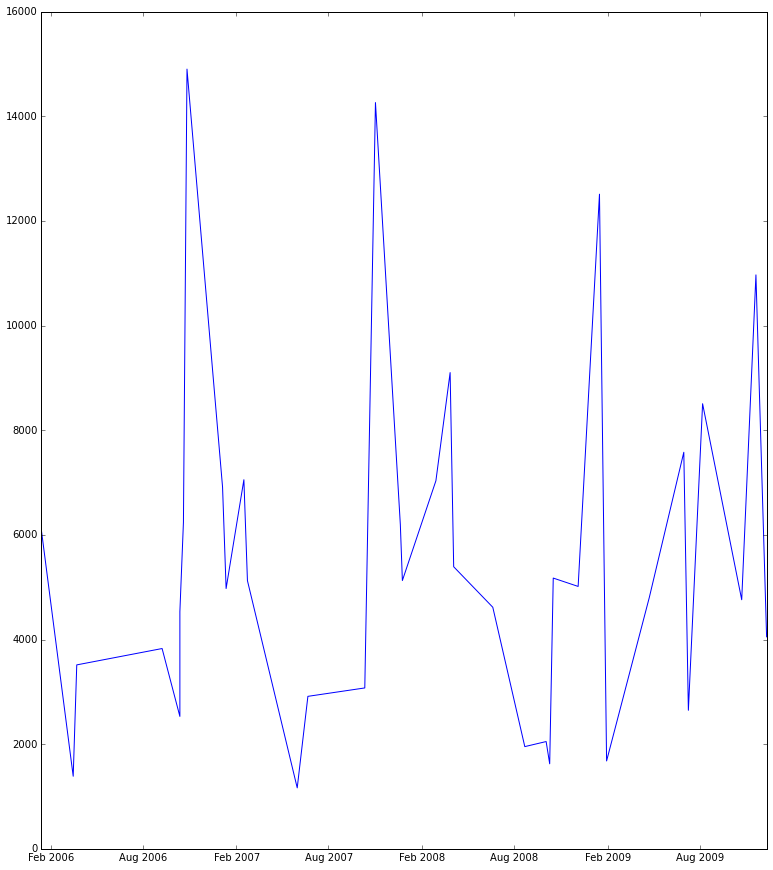

In [65]:
figure(figsize=(13,15))
trend = trend.sort(['date'])
plt.plot(trend['date'], trend['normalized_opening'])

In [66]:
trend['time_delta']=trend['date'].apply(lambda x: str(x - parser.parse('2006-1-13')))

In [67]:
trend

date  screens   opening  \
2006 Glory Road                 2006-01-13     2222  13594734   
     Find Me Guilty             2006-03-17      439    608804   
     The World's Fastest Indian 2006-03-24      114    400782   
     Hollywoodland              2006-09-08     1548   5926177   
     Infamous                   2006-10-13      179    452966   
     One Night with the King    2006-10-13      909   4120497   
     Marie Antoinette           2006-10-20      859   5361050   
     Catch a Fire               2006-10-27      136   2026997   
     The Pursuit of Happyness   2006-12-15     2852  26541709   
2007 Freedom Writers            2007-01-05     1360   9405582   
     Alpha Dog                  2007-01-12     1289   6412775   
     Breach                     2007-02-16     1489  10504990   
     Amazing Grace              2007-02-23      791   4054542   
     Gracie                     2007-06-01     1164   1355904   
     A Mighty Heart             2007-06-22     1355   3948863   
     Elizabeth: The Golden Age  2007-10-12     2001   6153075   
     American Gangster          2007-11-02     3054  43565115   
     Charlie Wilson's War       2007-12-21     2575  15952430   
     The Great Debaters         2007-12-25     1171   6005180   
2008 The Other Boleyn Girl      2008-02-29     1166   8203061   
     21                         2008-03-28     2648  24105943   
     Shine a Light              2008-04-04      276   1488081   
     The Edge of Love           2008-06-20     3012  13907130   
     The Longshots              2008-08-22     2089   4080687   
     Flash of Genius            2008-10-03     1098   2251075   
     The Duchess                2008-10-10     2808   4562675   
     The Express                2008-10-10     2808   4562675   
     W.                         2008-10-17     2030  10505668   
     Cadillac Records           2008-12-05      687   3445559   
2009 Notorious                  2009-01-16     1638  20497596   
     Milk                       2009-01-30      882   1481155   
     The Soloist                2009-04-24     2024   9716458   
     Public Enemies             2009-07-01     3334  25271675   
     In Search of Beethoven     2009-07-10     1858   4919433   
     Julie  Julia               2009-08-07     2354  20027956   
     Amelia                     2009-10-23      820   3904047   
     The Blind Side             2009-11-20     3110  34119372   
     Invictus                   2009-12-11     2125   8611147   

                                 normalized_opening          time_delta  
2006 Glory Road                         6118.242124     0 days 00:00:00  
     Find Me Guilty                     1386.797267    63 days 00:00:00  
     The World's Fastest Indian         3515.631579    70 days 00:00:00  
     Hollywoodland                      3828.279716   238 days 00:00:00  
     Infamous                           2530.536313   273 days 00:00:00  
     One Night with the King            4533.000000   273 days 00:00:00  
     Marie Antoinette                   6241.036088   280 days 00:00:00  
     Catch a Fire                      14904.389706   287 days 00:00:00  
     The Pursuit of Happyness           9306.349579   336 days 00:00:00  
2007 Freedom Writers                    6915.869118   357 days 00:00:00  
     Alpha Dog                          4975.000000   364 days 00:00:00  
     Breach                             7055.063801   399 days 00:00:00  
     Amazing Grace                      5125.843236   406 days 00:00:00  
     Gracie                             1164.865979   504 days 00:00:00  
     A Mighty Heart                     2914.290037   525 days 00:00:00  
     Elizabeth: The Golden Age          3075.000000   637 days 00:00:00  
     American Gangster                 14264.936149   658 days 00:00:00  
     Charlie Wilson's War               6195.118447   707 days 00:00:00  
     The Great Debaters                 5128.249360   711 days 00:00:00  
2008 The Other Boleyn 

In [68]:
trend['time_delta_num'] = trend['time_delta'].str.replace(r'days[\s\S]+', '').apply(lambda x: int(x))

In [69]:
trend1=trend

In [42]:
trend = trend[trend.screens < 3000]

In [43]:
def sort_season(x):
    if x in [11, 12, 1]:
        return 4
    if x in [5, 6, 7, 8]:
        return 2
    if x in [9, 10,]:
        return 3
    if x in [2, 3, 4,]:
        return 1
    

In [44]:
trend['season']=trend['date'].apply(lambda x: sort_season(x.month))

/Users/David/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [45]:
from patsy import dmatrices
from patsy import dmatrix
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
#plot_data = trend
y, X = dmatrices('normalized_opening ~ time_delta_num + season', data = trend.reset_index(), return_type= 'dataframe')
model = sm.OLS(y, X)
fitted = model.fit()
plot(X['time_delta_num'], y, 'go')
plot(X['time_delta_num'], fitted.fittedvalues, 'b')


NameError: name 'time_delta_num' is not defined

In [ ]:
trend['time_delta']=trend['date'].apply(lambda x: str(x - parser.parse('2006-1-01')))
trend['time_delta_num'] = trend['time_delta'].str.replace(r'days[\s\S]+', '').apply(lambda x: int(x))

def sort_season(x):
    if x in [11, 12, 1]:
        return 'Winter'
    if x in [5, 6, 7, 8]:
        return 'Summer'
    if x in [9, 10,]:
        return 'Fall'
    if x in [2, 3, 4,]:
        return 'Spring'

trend['season']=trend['date'].apply(lambda x: sort_season(x.month))
from patsy import dmatrices
from patsy import dmatrix
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
#plot_data = trend
y, X = dmatrices('normalized_opening ~ time_delta_num + season + level_0', data = trend.reset_index(), return_type= 'dataframe')
model = sm.OLS(y, X)
fitted = model.fit()
plot(X['time_delta_num'], y, 'go')
plot(X['time_delta_num'], fitted.fittedvalues, 'b')



In [46]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     normalized_opening   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.070
Date:                Thu, 08 Oct 2015   Prob (F-statistic):              0.395
Time:                        20:54:27   Log-Likelihood:                -360.02
No. Observations:                  38   AIC:                             732.0
Df Residuals:                      32   BIC:                             741.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept         2.756e+06   4.63e+06      0.595      0.556     -6.67e+06  1.22e+07
season[T.Spring]  1632.5066   2044.565      0.798      0.430     -2532.136  5797.149
season[T.Summer]   -27.2047   1856.134     -0.015      0.988     -3808.026  3753.616
season[T.Winter]  2982.9483   1540.698      1.936      0.062      -155.350  6121.247
time_delta_num       3.7809      6.078      0.622      0.538        -8.600    16.162
level_0          -1371.9827   2308.498     -0.594      0.556     -6074.239  3330.274
==============================================================================
Omnibus:                       12.072   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               11.855
Skew:                           1.164   Prob(JB):                      0.00266
Kurtosis:                       4.440   Cond. No.                     1.78e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
trend.reset_index()

,level_0,level_1,date,screens,opening,normalized_opening,season
0,2006,Catch a Fire,2006-10-27,136,2026997,14904.389706,3
1,2006,Find Me Guilty,2006-03-17,439,608804,1386.797267,1
2,2006,Glory Road,2006-01-13,2222,13594734,6118.242124,4
3,2006,Hollywoodland,2006-09-08,1548,5926177,3828.279716,3
4,2006,Infamous,2006-10-13,179,452966,2530.536313,3
5,2006,Marie Antoinette,2006-10-20,859,5361050,6241.036088,3
6,2006,One Night with the King,2006-10-13,909,4120497,4533.000000,3
7,2006,The Pursuit of Happyness,2006-12-15,2852,26541709,9306.349579,4
8,2006,The World's Fastest Indian,2006-03-24,114,400782,3515.631579,1
9,2007,A Mighty Heart,2007-06-22,1355,3948863,2914.290037,2


In [48]:
trend = trend.reset_index()
with open('biography.p', 'w') as picklefile:
    pickle.dump(trend, picklefile)